In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('Data_for_UCI_named.csv')
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [3]:
# check to see the total number of rows and columns
df.shape

(10000, 14)

In [4]:
# find the summation of null values in each column
df.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

#### Because of the direct relationship between 'stab' and 'stabf' ('stabf' = 'stable' if 'stab' <= 0, 'unstable' otherwise), 'stab' should be dropped and 'stabf' will remain as the sole dependent variable (binary classification).

In [5]:
df.drop(['stab'], axis=1, inplace=True)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,unstable


In [6]:
# check for the datatype
df.dtypes

tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stabf     object
dtype: object

#### Create LabelEncoders for columns with object dtypes 

In [ ]:
import sklearn.utils
df = sklearn.utils.shuffle(df)

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['stabf'] = encoder.fit_transform(df['stabf'])
print (df['stabf'].unique())

[1 0]


In [9]:
# split the dataset into target Y and predictors X
X = df.drop(columns=['stabf'])
Y = df['stabf']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1) 

In [11]:
# Accessing the classes in the stabf column, we see its imbalanced
Y_train.value_counts()

1    5092
0    2908
Name: stabf, dtype: int64

In [12]:
from imblearn.over_sampling import SMOTE

# initialise the SMOTE variable
smote = SMOTE(random_state = 1)

# Apply to the x and y train dataset
x_train_balance, y_train_balance = smote.fit_sample(X_train, Y_train)
y_train_balance.value_counts()

1    5092
0    5092
Name: stabf, dtype: int64

In [13]:
# Scale the dataset to ensure the features are within the range of 0-1

from sklearn.preprocessing import StandardScaler

# initialise the standard scaler
sc = StandardScaler()

Sc_x_train_balance = sc.fit_transform(x_train_balance)
Sc_x_test = sc.transform(X_test)

### Building Models

#### RandomForest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier

# create a randomforest object
Rf_model = RandomForestClassifier(n_estimators = 50)

# Train the model with the training dataset
Rf_model.fit(Sc_x_train_balance, y_train_balance)

RandomForestClassifier(n_estimators=50)

In [15]:
Rf_y_pred = Rf_model.predict(Sc_x_test)

In [16]:
from sklearn.metrics import accuracy_score
print('Accuracy : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = Rf_y_pred)))

Accuracy : 0.9125


#### ExtraTrees Classifier

In [17]:
from sklearn.ensemble import ExtraTreesClassifier

# create XtraTreeClassifier 
XTC_model = ExtraTreesClassifier(n_estimators = 50)
print(XTC_model)

ExtraTreesClassifier(n_estimators=50)


In [18]:
# train the dataset with the training dataset
XTC_model.fit(Sc_x_train_balance, y_train_balance)

ExtraTreesClassifier(n_estimators=50)

In [19]:
XTC_y_pred = XTC_model.predict(Sc_x_test)

In [20]:
from sklearn.metrics import accuracy_score
print ('Accuracy_XTC : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = XTC_y_pred)))

Accuracy_XTC : 0.9135


In [22]:
from sklearn.metrics import confusion_matrix
cnf_mat = confusion_matrix(y_true= Y_test, y_pred=XTC_y_pred)
cnf_mat

array([[ 635,   77],
       [  96, 1192]], dtype=int64)

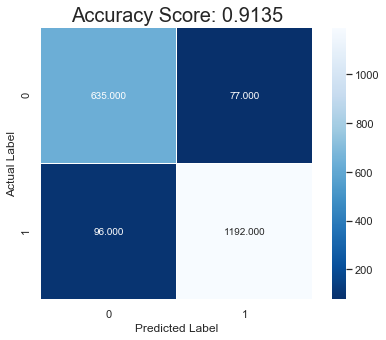

In [23]:
plt.figure(figsize=(7,5))
sns.heatmap(cnf_mat, annot=True, fmt='.3f', linewidths='.5', square=True, cmap='Blues_r');
plt.xlabel('Predicted Label');
plt.ylabel('Actual Label');
title = 'Accuracy Score: {0:.4f}'.format(accuracy_score(y_true=Y_test, y_pred=XTC_y_pred))
plt.title(title, size=20);

#### XGBoost model

In [24]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(n_estimators=50)
xgb_model.fit(Sc_x_train_balance, y_train_balance)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [25]:
xgb_y_pred = xgb_model.predict(Sc_x_test)

In [26]:
print ('Accuracy_xgb : {0:.4f}'. format(accuracy_score(y_true = Y_test, y_pred = xgb_y_pred)))

Accuracy_xgb : 0.9365


#### LGBM Model

In [27]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier(n_estimator=50)
lgb_model.fit(Sc_x_train_balance, y_train_balance)

LGBMClassifier(n_estimator=50)

In [29]:
lgb_y_pred = lgb_model.predict(Sc_x_test)

In [33]:
print('Accuracy_lgb : {0:.4f}'. format(accuracy_score(y_true=Y_test, y_pred=lgb_y_pred)))

Accuracy_lgb : 0.9345


#### RandomisedSearchCV

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

# specify the parameter distribution to checked
param_dist = {
    'n_estimators' : [50, 100, 300, 500, 1000],
    'min_samples_split' : [2, 3, 5, 7, 9],
    'min_samples_leaf' : [1, 2, 4, 6, 8],
    'max_features' : ['auto', 'sqrt', 'log2', None] 
}

classifier = ExtraTreesClassifier()

random_search = RandomizedSearchCV(classifier, param_distributions=param_dist, n_iter=10, scoring='roc_auc',
                                   n_jobs=-1, cv=5, verbose=1, random_state=1)

In [35]:
random_search.fit(X,Y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  1.3min finished


RandomizedSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 300, 500,
                                                         1000]},
                   random_state=1, scoring='roc_auc', verbose=1)

In [37]:
random_search.best_estimator_

ExtraTreesClassifier(min_samples_leaf=2, min_samples_split=9, n_estimators=300)

In [38]:
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 9,
 'min_samples_leaf': 2,
 'max_features': 'auto'}

In [39]:
classifier = ExtraTreesClassifier(min_samples_leaf=2, min_samples_split=9, n_estimators=300)

In [40]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(classifier, X,Y, cv=10)

score

array([0.918, 0.924, 0.93 , 0.925, 0.935, 0.937, 0.924, 0.927, 0.919,
       0.915])

In [41]:
score.mean()

0.9254000000000001

#### Feature Selection using Extra Tree Classifiers

In [47]:
# train the model with the predictors(X) and target(Y) of the train dataset
classifier.fit(X, Y)

# using the fitted classifier object, obtain the feature importances
feature_Selection = classifier.feature_importances_

In [58]:
print(feature_Selection)

[0.1344383  0.13508359 0.12786258 0.13277089 0.01835617 0.02088797
 0.02054988 0.02040918 0.09104497 0.09789201 0.1059302  0.09477425]


In [60]:
# Normalise the individual features
feature_importance_normalized = np.std([tree.feature_importances_ for tree in 
                                        classifier.estimators_], 
                                        axis = 0) 

#### Visualization and Comparing of results

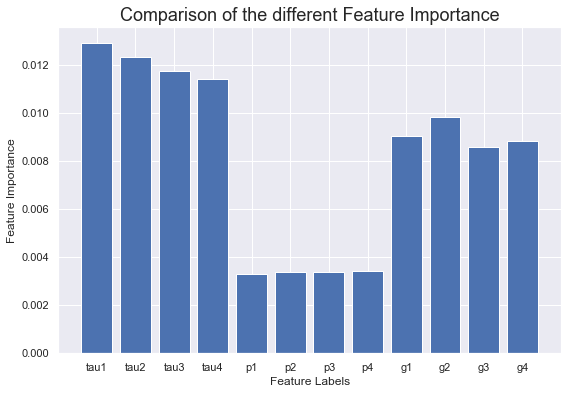

In [61]:
plt.figure(figsize=(9,6))
plt.bar(X.columns, feature_importance_normalized)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importance')
plt.title('Comparison of the Different Feature Importance', size=18)
plt.show()